# Исследования рынка общепита в Москве для принятия решения об открытии нового заведения

## Изучение и предобработка данных

In [1]:
#Импортируем библиотеки для работы
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Код для игнорирования предупреждений
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#Загрузим датасет с данными о ресторанах общественного питания Москвы
rest_data = pd.read_csv('C:/Anaconda/Project cafe Moscow/rest_data.csv') 
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [4]:
#Получим общую информацию о данных
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


В таблице 15336 записей, пропусков нет, данные содержатся в целочисленном и строковом форматах.

In [5]:
#Проверим наличие полных дубликатов
rest_data.duplicated().sum()

0

Полные дубликаты отсутствуют.

In [6]:
#Изучим названия сетевых заведений
rest_data[rest_data['chain'] == 'да']['object_name'].unique()

array(['ПИЦЦЕТОРИЯ', 'Брусника', 'Алло Пицца', 'Суши Wok', 'Тануки',
       "Домино'с Пицца", 'Готика', 'Му-Му', 'Хлеб насущный', 'TAJJ MAHAL',
       'ДАНКИН ДОНАТС', 'Вареничная №1', 'ШОКОЛАДНИЦА', 'Теремок',
       'Хинкальная', 'Шантимель', 'ТАНУКИ', 'Шоколадница', 'МУ-МУ',
       'Хинкальная City', 'КРУЖКА', 'СУШИ ВОК', 'ПРИМАВЕРА', 'Виктория',
       'Пиццерия «АКАДЕМИЯ»', 'Чебуречная СССР', 'МАКДОНАЛДС',
       'Grand Cru', 'Чайхона №1', 'Панчо Пицца', 'KFC', 'Сабвей',
       'ресторан «Якитория»', 'Советские времена', 'Кафе «Андерсон»',
       'Кафе «Subway»', 'Ресторан «Макдоналдс»', 'Суши Сет', 'Суши WoK',
       'Шоколад', 'Тирольские пироги', 'Гамбринус', 'Пицца Фабрика',
       'Subway', 'Кафе «Якитория»', 'Кафе «Тануки»', 'Сити Пицца',
       'Кружка', 'Кофе Хаус',
       'Кулинарная Лавка Братьев Караваевых Братья Караваевы', 'Суши Вок',
       'Прайм', 'Пицца Экспресс', 'Шоколадница Кофе Хаус', 'Николай',
       'Якитория', 'МАГНОЛИЯ', 'КОФЕ С СОБОЙ', 'Джаганнат', 'Волк

Далее в анализе заведений нам необходимо будет считать их количество, группировать, поэтому избавимся от неявных дубликатов.

In [7]:
#Приведем названия к нижнему регистру
rest_data['object_name'] = rest_data['object_name'].str.lower()

Напишем функцию для основных сетевых заведений, что бы сократить количество неявных дубликатов из-за разного написания названий.

In [8]:
#напишем функцию для основных сетевых заведений
def new_name(row):
    if 'wok' in row or 'вок' in row:
        return  'суши wok'
    elif 'subway' in row or 'сабвей' in row:
        return 'subway'
    elif 'макдона' in row or 'mcdonal' in row:
        return 'mcdonalds'
    elif 'шоколадница' in row:
        return 'шоколадница'
    elif 'штолле' in row:
        return 'штолле'
    elif 'kfc' in row:
        return 'kfc'
    elif 'starbucks' in row or 'старбакс' in row:
        return 'starbucks'
    elif 'бургер кинг' in row or 'burger king' in row:
        return 'burger king'
    elif 'теремок' in row:
        return 'теремок'
    elif 'кофе хаус' in row:
        return 'кофе хаус'
    elif 'мята lounge' in row:
        return 'мята lounge'
    
    return row

In [9]:
#Перезапишем стобцем с названиями объектов
rest_data['object_name'] = rest_data['object_name'].apply(new_name)
rest_data.sample(5)

,id,object_name,chain,object_type,address,number
1145,150996,кулинария,нет,магазин (отдел кулинарии),"город Москва, Сходненская улица, дом 44/17",2
1042,26272,ресторан «золотое время»,нет,ресторан,"город Москва, Севанская улица, дом 15, корпус 1",80
3916,97160,шашлычная,нет,кафе,"город Москва, проспект Будённого, дом 32",2
12257,191190,лукойл,да,кафе,"город Москва, поселение Московский, Киевское ш...",17
4287,20352,бар «терраса»,нет,бар,"город Москва, проспект Мира, дом 150",100


`Основной вывод по разделу`

В результате первичного знакомства с данными было установлено:
- Данные представлены в численных и строковых форматах;
- В названиях были разные регистры, присутствовали неявные дубликаты из-за разного написания.

Данные были обработаны и теперь готовы для исследовательского анализа данных.

## Исследовательский анализ данных

`Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.`

In [12]:
#Создадим сводную таблицу по видам объектов общ питания
cafe_type = (
    rest_data
    .pivot_table(index='object_type', values='id', aggfunc='count')
    .reset_index()
    .sort_values(by='id', ascending=False)
)
cafe_type

,object_type,id
3,кафе,6099
8,столовая,2587
7,ресторан,2285
6,предприятие быстрого обслуживания,1923
0,бар,856
1,буфет,585
4,кафетерий,398
2,закусочная,360
5,магазин (отдел кулинарии),273


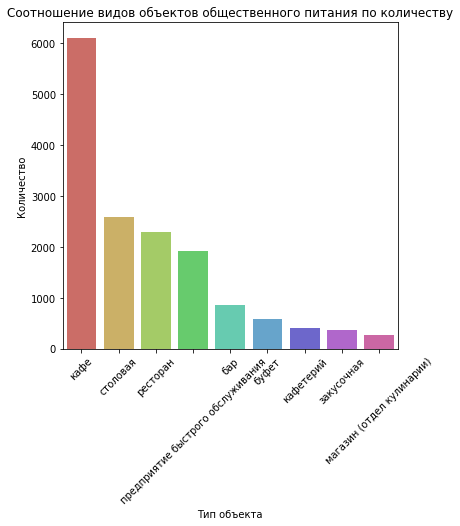

In [13]:
#Построим столбчатую диаграмму
fig, test = plt.subplots()
sns.barplot(x='object_type', y='id', data=cafe_type, palette='hls')

test.set_title('Cоотношение видов объектов общественного питания по количеству')
test.set_xlabel('Тип объекта')
test.set_ylabel('Количество')
plt.xticks(rotation=45)
fig.set_figheight(6)
fig.set_figwidth(6)
plt.show()

`Основные выводы`

- С большим отрывом лидируют категория "кафе" - около 6000 заведений;
- На втором месте идут "столовые", но значительно уступают кафе, около 2500 заведений;
- Топ-3 по количеству замыкают рестораны, примерно 2200 заведений;
- Меньше всего заведений у кафетериев, закусочных, отделов кулинарии. Можно предположить, что у данных объектов меньше всего заведений ввиду непопулярности таких форматов в настоящее время.

`Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.`

In [14]:
#Создадим сводную таблицу по сетевым/несетевым заведениям
cafe_chain = (
    rest_data
    .pivot_table(index='chain', values='id', aggfunc='count')
    .reset_index()
    .sort_values(by='id', ascending=False)
)
cafe_chain

,chain,id
1,нет,12398
0,да,2968


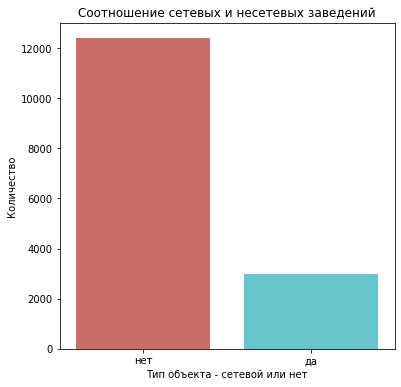

In [15]:
#Построим столбчатую диаграмму
fig, test = plt.subplots()
sns.barplot(x='chain', y='id', data=cafe_chain, palette='hls')

test.set_title('Cоотношение сетевых и несетевых заведений')
test.set_xlabel('Тип объекта - сетевой или нет')
test.set_ylabel('Количество')
fig.set_figheight(6)
fig.set_figwidth(6)
plt.show()

`Основные выводы`

С огромным отрывом (примерно 12000 против 3000) превалируют заведения несетевого характера. Сетевые заведения составляют примерно 18% от общего количества объектов общ питания.\
Сейчас достаточно популярны небольшие кафе/кофейни, авторские места. Они могут привлекать клиентов своей уникальностью и нетипичным (если сравнивать с сетевыми заведениями) дизайном интерьеров, меню.

`Для какого вида объекта общественного питания характерно сетевое распространение?`

In [16]:
#напишем функцию для получения целочисленных значений столбца ['chain']
def chain_count(row):
    if 'да' in row:
        return 1
    return 0

In [17]:
#Создадим новый столбец, где получим целочисленные значения столбца ['chain']
rest_data['chain_number'] = rest_data['chain'].apply(chain_count)
rest_data.sample(5)

,id,object_name,chain,object_type,address,number,chain_number
10420,187193,пекарня,нет,магазин (отдел кулинарии),"город Москва, Перовская улица, дом 26, корпус 1",0,0
15337,208477,милти,да,предприятие быстрого обслуживания,"город Москва, 3-й Крутицкий переулок, дом 18",0,1
7824,125327,кафе мицва,нет,кафе,"город Москва, Пятницкая улица, дом 3/4, строен...",49,0
8300,74893,остерия бьянка,нет,ресторан,"город Москва, улица Бутырский Вал, дом 10",98,0
6421,19757,бар,нет,бар,"город Москва, улица Улофа Пальме, дом 5, строе...",12,0


In [18]:
#Произведем группировку по объектам питания, посчитаем доли сетевых в общем количестве заведений в категории
chain_eat = rest_data.groupby('object_type').agg({'chain_number':['sum', 'count']})
chain_eat.columns = ['chain', 'no_chain']
chain_eat['perc'] = round(chain_eat['chain']/chain_eat['no_chain'] * 100, 2)
chain_eat = chain_eat.sort_values(by='perc', ascending=False)
chain_eat

,chain,no_chain,perc
object_type,,,
предприятие быстрого обслуживания,791,1923,41.13
магазин (отдел кулинарии),78,273,28.57
ресторан,544,2285,23.81
кафе,1396,6099,22.89
закусочная,56,360,15.56
кафетерий,52,398,13.07
бар,37,856,4.32
буфет,11,585,1.88
столовая,3,2587,0.12


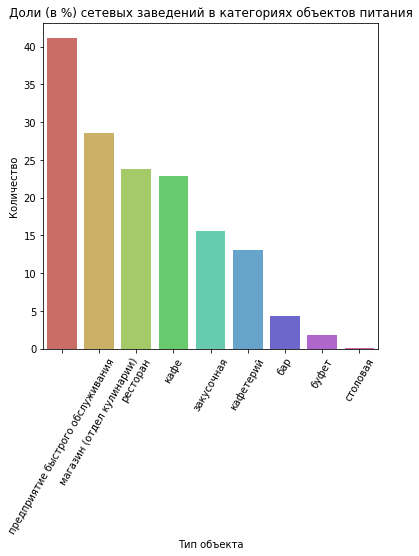

In [19]:
#Построим столбчатую диаграмму
fig, test = plt.subplots()
sns.barplot(x=chain_eat.index, y='perc', data=chain_eat, palette='hls')

test.set_title('Доли (в %) сетевых заведений в категориях объектов питания')
test.set_xlabel('Тип объекта')
test.set_ylabel('Количество')
plt.xticks(rotation=60)
fig.set_figheight(6)
fig.set_figwidth(6)
plt.show()

`Основные выводы`

- Самый большой процент сетевых заведений выделяется в сегменте предприятий быстрого обслуживания - 41%;
- Так же в топ-3 выходят отделы кулинарии и рестораны;
- Меньше всего сетевых заведений в относительном выражении в барах, буфетах, столовых.

`Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?`

Произведем группировку по сетевым ресторанам, что бы получить новую таблицу.\
У каждой сети найдём количество ресторанов и среднее количество посадочных мест.

In [20]:
#Произведем группировку по сетевым ресторанам
rest_chain = (
    rest_data
    .query('chain_number == 1')
    .groupby('object_name')
    .agg({'object_name':'count', 'number':'mean'})
)
rest_chain.columns = ['count_rest', 'mean_seats']
rest_chain.sort_values(by='count_rest', ascending=False)

,count_rest,mean_seats
object_name,,
kfc,188,55.835106
шоколадница,185,57.648649
mcdonalds,173,87.017341
burger king,159,48.144654
суши wok,115,10.182609
...,...,...
кафе «чайхана тапчан»,1,102.000000
кафе «хлеб насущный»,1,38.000000
кафе «урюк» хивинская чайхона,1,50.000000


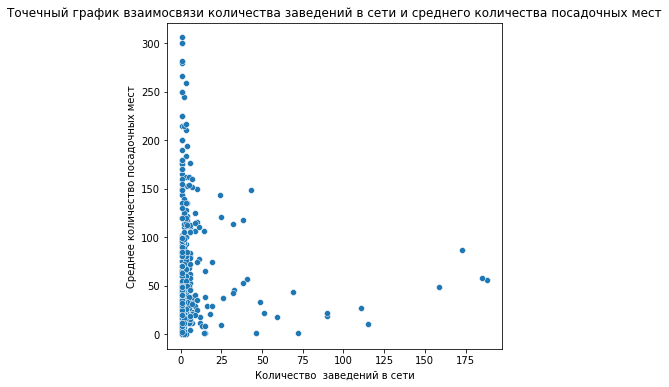

In [21]:
#Построим точечный график взаимосвязи количества ресторанов в сети от среднего количества посадочных мест
fig, test = plt.subplots()
sns.scatterplot(x='count_rest', y='mean_seats', data=rest_chain)
test.set_title('Точечный график взаимосвязи количества заведений в сети и среднего количества посадочных мест')
test.set_xlabel('Количество  заведений в сети')
test.set_ylabel('Среднее количество посадочных мест')
fig.set_figheight(6)
fig.set_figwidth(6)
plt.show()

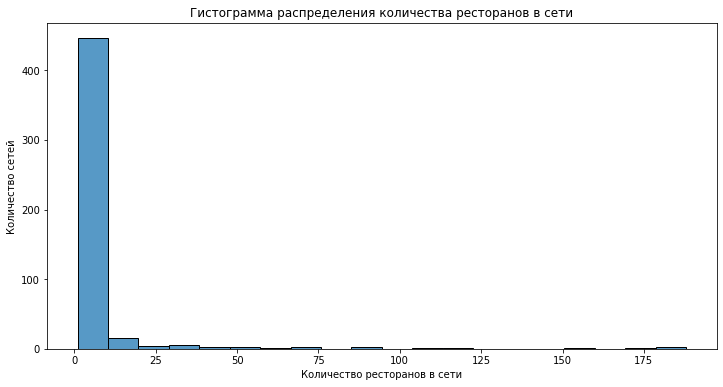

In [22]:
#Построим гистограмму распределения количества ресторанов в сети
plt.figure(figsize=(12,6))
ax = sns.histplot(rest_chain['count_rest'], bins=20)
plt.title('Гистограмма распределения количества ресторанов в сети')
plt.xlabel('Количество ресторанов в сети')
plt.ylabel('Количество сетей')
plt.show()

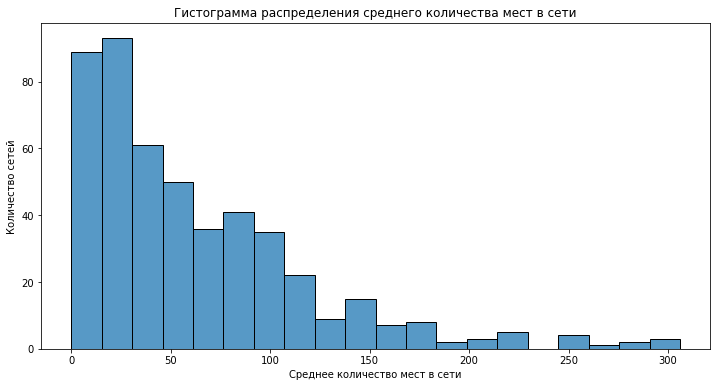

In [23]:
#Построим гистограмму распределения среднего количества мест в сети
plt.figure(figsize=(12,6))
ax = sns.histplot(rest_chain['mean_seats'], bins=20)
plt.title('Гистограмма распределения среднего количества мест в сети')
plt.xlabel('Среднее количество мест в сети')
plt.ylabel('Количество сетей')
plt.show()

`Основные выводы`

В результате анализа точечного графика взамосвязи количества заведений в сети и среднего количества посадочных мест:
- Преобладает большое количество заведений с небольшим количеством посадочных мест. При значениях > 100 посадочных мест на графике количество точек убывает, что говорит о снижающемся количестве заведений;
- На графике хорошо видны сети быстрого питания, у которых количество ресторанов > 100. В то же время, у данных ресторанов количество посадочных мест в среднем тоже не более 100;
- Есть сети, у которых количество мест равно, либо около 0. Что характерно для быстрого питания (например, точки МакАвто).

`Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.`

In [24]:
#Создадим сводную таблицу по видам объектов общ питания и среднему количесту посадочных мест
cafe_seats = (
    rest_data
    .pivot_table(index='object_type', values='number', aggfunc='mean')
    .reset_index()
    .sort_values(by='number', ascending=False)
    .round(2)
)
cafe_seats

,object_type,number
8,столовая,130.25
7,ресторан,96.83
1,буфет,51.13
0,бар,43.49
3,кафе,39.72
6,предприятие быстрого обслуживания,20.55
4,кафетерий,9.12
2,закусочная,7.61
5,магазин (отдел кулинарии),5.59


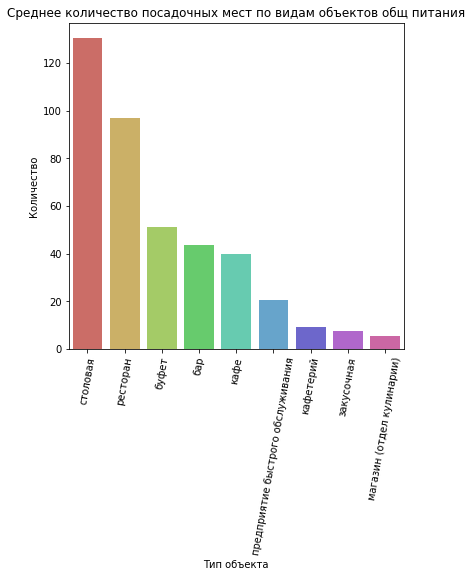

In [25]:
#Построим столбчатую диаграмму
fig, test = plt.subplots()
sns.barplot(x='object_type', y='number', data=cafe_seats, palette='hls')

test.set_title('Cреднее количество посадочных мест по видам объектов общ питания')
test.set_xlabel('Тип объекта')
test.set_ylabel('Количество')
plt.xticks(rotation=80)
fig.set_figheight(6)
fig.set_figwidth(6)
plt.show()

`Основные выводы`

- Самое большое количество посадочных мест представлено в столовых (в среднем около 130);
- В топ-3 по среднему количеству посадочных мест входят рестораны (около 97) и буфеты (около 51);
- Меньше всего посадочных мест в кафетериях (около 9), закусочные (около 8) и отделы кулинарии (около 6). Малое количество посадочных мест связано с тем, что клиенты в основном берут продукцию с собой, либо быстро употребляют её на месте и уходят.

`Выделите в отдельный столбец информацию об улице из столбца address`

Для выделения информации об улице нам необходимо изучить, какие "формулировки" улиц (бульвары, проспекты) встречаются в Москве.

In [26]:
#Отменим лимит на вывод строк и посмотрим 100 случайных записей
pd.set_option('max_rows', None)

rest_data.sample(100)

,id,object_name,chain,object_type,address,number,chain_number
6178,89666,шоколадница,да,кафе,"город Москва, Ленинский проспект, дом 109",30,1
14371,206918,urban cafe,нет,кафе,"город Москва, Смоленская площадь, дом 3",10,0
10279,188529,кафе 24 градуса,нет,кафе,"город Москва, улица Добролюбова, дом 20",15,0
4607,28894,столовая при гоу спец. школе-интернате 20,нет,столовая,"город Москва, Новочеркасский бульвар, дом 28",40,0
8739,145078,сити пицца,да,предприятие быстрого обслуживания,"город Москва, город Зеленоград, корпус 2309А",45,1
11814,175912,lafka bar,нет,кафе,"город Москва, поселение Воскресенское, посёлок...",10,0
12104,190834,додо пицца,да,кафе,"город Москва, Тимирязевская улица, дом 11",40,1
7868,153974,буфет при гбу г. москвы нии скорой помощи им. ...,нет,буфет,"город Москва, Большая Сухаревская площадь, дом...",0,0
2556,76759,спорт-бар «торнадо»,нет,бар,"город Москва, Нахимовский проспект, дом 57",50,0
6424,22898,ресторан «премьер-спорт»,нет,ресторан,"город Москва, улица Улофа Пальме, дом 5, строе...",36,0


Были отмечены основные варианты - переулок, проспект, набережная, площадь, улица, проезд, бульвар, шоссе, тупик.\
Так же встречаются названия городских поселений, других городов (например, Зеленоград).\
Для более корректного выделения названия улицы, напишем функцию.

In [27]:
#Вернём количество выводимых строк = 10
pd.set_option('max_rows', 10)

In [28]:
#Создадим список с синонимами улицы
street_def = ['переулок', 'проспект', 'набережная', 'площадь', 'улица', 'проезд', 'бульвар', 'шоссе', 'тупик']

#Напишем функцию для выделения улицы в отдельный столбец
def get_street(row):
    for e in row.split(','):
        for i in street_def:
            if i in e.lower():
                return e

#Применим функцию к новому столбцу
rest_data['street'] = rest_data['address'].apply(get_street)
rest_data['street'] = rest_data['street'].str.strip()
rest_data.head()

,id,object_name,chain,object_type,address,number,chain_number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,0,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,0,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,0,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,1,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,0,Абрамцевская улица


Узнаем, сколько пропусков в столбце street. Это названия населенных пунктов, а так же не самые популярные синонимы "улицы", которые не попали в список `street_def`.

In [29]:
#Посчитаем количество пропусков в новом столбце street
print('Всего записей:', len(rest_data['street']))
print('Пропусков:', rest_data['street'].isna().sum())
print('% пропусков:', (rest_data['street'].isna().sum()/len(rest_data['street']))*100)

Всего записей: 15366
Пропусков: 446
% пропусков: 2.902512039567877


`Основные выводы`

- Была написана и применена функция для выделения названия улицы;
- Названия улиц, которые мы не смогли выделить составляют около 3% от общего количества. Сочтём это допустимой погрешностью.

`Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?`

In [30]:
#Получим таблицу с топ-10 улиц по количеству объектов общественного питания
top_10_street = (
    rest_data
    .pivot_table(index='street', values='id', aggfunc='count')
    .rename(columns={'id': 'number'})
    .sort_values(by='number', ascending=False)
    .reset_index()
    .head(10)
)
top_10_street

,street,number
0,проспект Мира,204
1,Профсоюзная улица,183
2,Ленинградский проспект,173
3,Пресненская набережная,167
4,Варшавское шоссе,165
5,Ленинский проспект,148
6,проспект Вернадского,132
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


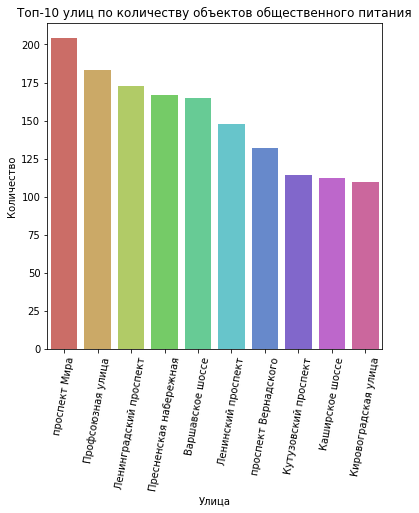

In [31]:
#Построим столбчатую диаграмму топ-10 улиц
fig, test = plt.subplots()
sns.barplot(x='street', y='number', data=top_10_street, palette='hls')

test.set_title('Топ-10 улиц по количеству объектов общественного питания')
test.set_xlabel('Улица')
test.set_ylabel('Количество')
plt.xticks(rotation=80)
fig.set_figheight(6)
fig.set_figwidth(6)
plt.show()

Добавим информацию о районах из внешнего источника с репозитория Dspace. 

In [32]:
#Получим датасет о районах из внешнего источника
area_info = pd.read_csv('https://frs.noosphere.ru/xmlui/bitstream/handle/20.500.11925/714058/mosgaz-streets.csv')
area_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 4 columns):
streetname    4398 non-null object
areaid        4398 non-null int64
okrug         4398 non-null object
area          4398 non-null object
dtypes: int64(1), object(3)
memory usage: 137.6+ KB


Пропусков в данных нет, находятся в удобных для работы в форматах. Произведем переименования столбца с улицами.

In [33]:
#Переименуем название столбца с улицами
area_info = area_info.rename(columns={'streetname': 'street'})
area_info.head()

,street,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [34]:
#объединим таблицы rest_data с районами
street_area = rest_data.merge(area_info[['street', 'area']], on='street', how='left')

In [35]:
#Проверим количество уникальных улиц до и после присоединения
print(len(rest_data['street'].unique()))
print(len(street_area['street'].unique()))

1883
1883


После присоединения таблицы с районом получилась ситуация, что одна улица может проходить через несколько районов Москвы. Без специальных геосервисов невозможно точно определить, в каком именно районе расположен участок улицы с заведениями.\
Сделаем срез основной таблицы по топ-10 улицам, затем произведём группировку по районам и определим самые плотно заселённые предприятиями общественного питания районы.

In [36]:
#Сделаем срез новой таблицы, что бы остались улицы только из топ-10 по количеству заведений, удалим полные дубликаты
top_street_area = street_area[street_area['street'].isin(top_10_street['street'])].drop_duplicates()

#Произведём группировку по районам, посчитаем количество заведений в каждом районе
top_id_area = (
    top_street_area
    .groupby('area').agg({'id':'count'})
    .rename(columns={'id': 'number'})
    .reset_index()
    .sort_values(by='number', ascending=False)
    .head(10)
)
top_id_area

,area,number
25,Район Теплый Стан,331
6,Обручевский район,331
2,Донской район,313
19,Район Проспект Вернадского,280
3,Ломоносовский район,280
26,Район Тропарево-Никулино,280
11,Район Гагаринский,280
16,Район Нагатино-Садовники,277
30,Район Чертаново Центральное,275
29,Район Чертаново Северное,275


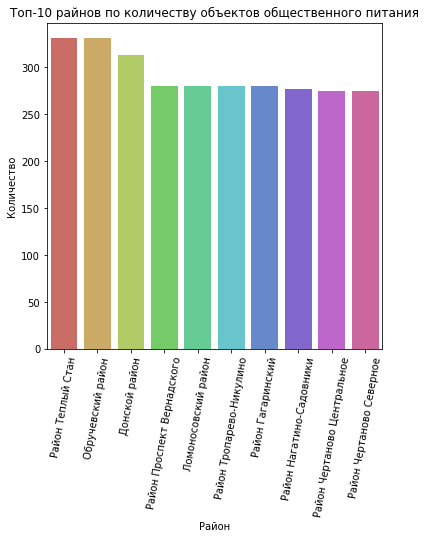

In [37]:
#Построим столбчатую диаграмму топ-10 районов
fig, test = plt.subplots()
sns.barplot(x='area', y='number', data=top_id_area, palette='hls')

test.set_title('Топ-10 райнов по количеству объектов общественного питания')
test.set_xlabel('Район')
test.set_ylabel('Количество')
plt.xticks(rotation=80)
fig.set_figheight(6)
fig.set_figwidth(6)
plt.show()

`Основные выводы`

- Был получен топ-10 улиц по количеству объектов общественного питания. Самые популярные - проспект Мира, Профсоюзная улица, Ленинградский проспект;
- Топ-10 улиц проходят в 37 районах Москвы. Без специальных геосервисов невозможно точно определить, в каком именно районе расположено каждое заведение;
- Районы, в которых больше всего заведений - Тёплый стан, Обручевский район, Донской район. Данные районы расположены не в центре города - высокую концетрацию заведений можно объяснить более низкой арендной платой, большой концентрацией людей в спальных районых.

`Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?`

In [38]:
#Получим таблицу c одним объектом общественного питания
one_cafe_street = (
    rest_data
    .pivot_table(index='street', values='id', aggfunc='count')
    .rename(columns={'id': 'number'})
    .sort_values(by='number', ascending=True)
    .reset_index()
    .query('number == 1')
)
one_cafe_street

,street,number
0,Перовский проезд,1
1,Изваринская улица,1
2,Известковый переулок,1
3,Измайловская площадь,1
4,переулок Васнецова,1
...,...,...
536,улица Лапина,1
537,улица Кубинка,1
538,Большая Ширяевская улица,1
539,Богоявленский переулок,1


In [39]:
#Объединим таблицу с одним объектом с внешней таблицей с районами
one_cafe_merge = one_cafe_street.merge(area_info[['street', 'area']], on='street', how='left')
one_cafe_merge

,street,number,area
0,Перовский проезд,1,Район Лефортово
1,Перовский проезд,1,Нижегородский район
2,Изваринская улица,1,Район Внуково
3,Известковый переулок,1,Таганский район
4,Измайловская площадь,1,Район Измайлово
...,...,...,...
582,улица Лапина,1,Район Лефортово
583,улица Кубинка,1,Можайский Район
584,Большая Ширяевская улица,1,Район Сокольники
585,Богоявленский переулок,1,Тверской район


In [40]:
#Проверим количество уникальных улиц до и после присоединения
print(len(one_cafe_street['street'].unique()))
print(len(one_cafe_merge['street'].unique()))

541
541


In [41]:
#Произведём группировку по районам
one_cafe_group = (
    one_cafe_merge
    .groupby('area').agg({'street':'count'})
    .reset_index()
    .sort_values(by='street', ascending=False)
    .head(10)
)
one_cafe_group

,area,street
94,Таганский район,27
80,Район Хамовники,26
3,Басманный район,25
21,Пресненский район,20
95,Тверской район,20
22,Район Арбат,18
52,Район Марьина роща,18
13,Мещанский район,16
34,Район Замоскворечье,14
48,Район Лефортово,12


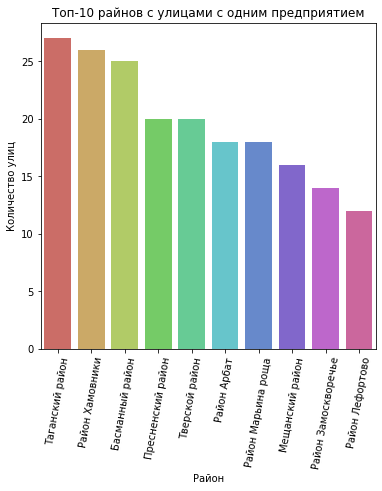

In [42]:
#Построим столбчатую диаграмму топ-10 районов с улицами с одним предприятием
fig, test = plt.subplots()
sns.barplot(x='area', y='street', data=one_cafe_group, palette='hls')

test.set_title('Топ-10 райнов с улицами с одним предприятием')
test.set_xlabel('Район')
test.set_ylabel('Количество улиц')
plt.xticks(rotation=80)
fig.set_figheight(6)
fig.set_figwidth(6)
plt.show()

`Основные выводы`

- Число улиц с одним объектом общественного питания равняется 541;
- Топ-5 районов, в которых больше всего улиц с одним объектом общественного питания - Таганский, Хамовники, Басманный, Пресненский, Тверской. Количество улиц с одним объектом колеблется от 20 до 27;
- Данные районы расположены в центральной части города, где должна быть высокая арендная плата, не каждый может позволить платить такую цену;
- В центральной части города часто встречаются небольшие улицы и переулки, где может быть одно заведение. Но количество таких маленьких улиц может быть большим в рамках района.

`Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?`

In [43]:
#Произведём группировку улицам и выведем среднее количество посадочных мест
streets_seats = (
    top_street_area
    .groupby('street').agg({'number':'mean'})
    .sort_values(by='number', ascending=False)
    .round(0)
    .astype('int')
)
streets_seats

,number
street,
Кутузовский проспект,85
проспект Вернадского,67
Ленинский проспект,63
проспект Мира,63
Кировоградская улица,60
Каширское шоссе,55
Варшавское шоссе,52
Ленинградский проспект,52
Профсоюзная улица,47


In [44]:
#Выведем инфо о количестве посадочных мест для среза streets_seats
rest_data[rest_data['street'].isin(streets_seats.index)]['number'].describe()

count    1508.000000
mean       57.965517
std        89.955523
min         0.000000
25%        12.000000
50%        38.500000
75%        75.000000
max      1700.000000
Name: number, dtype: float64

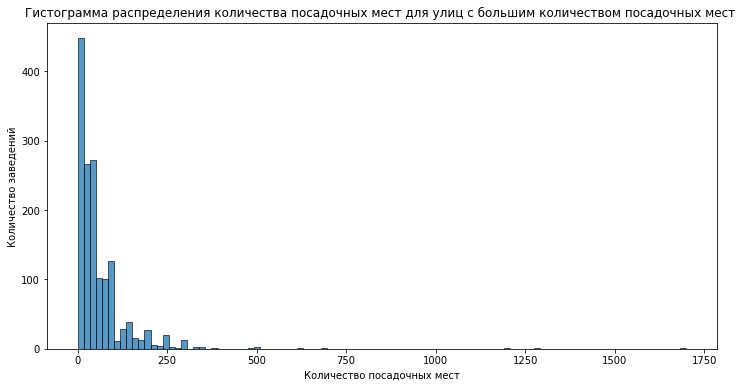

In [45]:
plt.figure(figsize=(12,6))
ax = sns.histplot(rest_data[rest_data['street'].isin(streets_seats.index)]['number'], bins=100)
plt.title('Гистограмма распределения количества посадочных мест для улиц с большим количеством посадочных мест ')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Количество заведений')
plt.show()

`Основные выводы`

Для улиц с большим количеством объектов общественного питания характерно:
- В среднем в заведениях на этих улицах около 58 посадочных мест;
- По гистограмме видно, что много заведений с посадочными местами от 0 и до 50;
- Можно предположить, что на этих улицах доминируют предприятия быстрого питания, кафе и бары;
- Если анализировать по улицам с большим количеством объектов общественного питания, то в среднем на Кутузовском проспекте - больше всего посадочных мест - 85. Возможно, на этой улице есть рестораны, которые обладают большими залами и большей вместительностью;
- Для остальных улиц из списка топ-10 количество посадочных мест в среднем варьируется от 46 (на Пресненской набережной) до 67 (на проспекте Вернадского).

`Общий вывод и рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.`

Был проведён анализ данных из открытых источников о заведениях общественного питания в Москве и установлены следующие характеристики:
- Из заведений общественного питания больше всего - кафе. Их около 6000 во всём городе;
- Сетевые заведения - всего 18% от общего количества предприятий общепита;
- Самая большая доля сетевых заведений - в предприятиях быстрого обслуживания (41%);
- Для сетевых заведений характерно большое количество заведений с небольшим количеством посадочных мест (от 0 до 100);
- В среднем самое большое количество мест (около 130) представлено в столовых;
- Самые популярные улицы по количеству объектов общепита - проспект Мира (204), Профсоюзная улица (183), Ленинградский проспект (173). На основе списка с 10 самыми популярными улицами выделены районы, в которых самая высокая конкуренция. Это районы Тёплый стан, Обручевский район, Донской район. Они располагаются в некотором удалении от центра города, так же отчасти это спальные районы с высокой концентрацией людей;
- Было выделено 541 улица с одним объектом общепита. Установлены районы с самой высокой концетрацией "улиц-одиночек" - это Таганский, Хамовники, Басманный районы. Они располагаются в центре города;
- Количество посадочных мест на самых популярных улицах варьируется от 46 (Пресненская набережная) до 85 (Кутузовский проспект). В среднем количество посадочных мест на самых популярных улицах 58.

Изначальная цель проекта - открыть небольшое кафе, где гостей должны обслуживать роботы.\
Основные рекомендации:
- Исходя из анализа данных, среди кафе - самая большая конкуренция (около 6000 предприятий). Стоит искать улицы и районы с более низкой конкуренцией;
- Для заведения наиболее оптимальны помещения с количеством посадочных мест около 40. Это самый распространённый формат среди кафе;
- Среди районов расположения наиболее привлекательными выглядят центральные (например, Таганский, Хамовники, Басманный). Среди данных районов много улиц с 1 предприятием общепита, что снижает конкуренцию новому предприятию. В то же время, аренда/покупка помещения будет выше, чем в отдалённых от центра районах.

Возможности развития сети:
- Открытие новых точек на других улицах центральных районов города;
- Открытие франшизы кафе;
- Разработка мобильного приложения для заказа еды к конкретному времени в кафе;
- Организация службы доставки посредством роботов;
- Разработка системы лояльности клиентов.

## Подготовка презентации для инвесторов

Презентация: https://drive.google.com/file/d/18mdb38wndSwzdz1AVlSZhKiMwqrO3UPi/view?usp=sharing 